In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Load the dataset
# Replace 'data.csv' with your file path if running locally
df=pd.read_csv("C:/Users/mohan/Downloads/archive/training_data.csv")
print(df)

      additives_n  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0             0.0     50.00                7.81               21.88   
1             0.0     50.00                6.25               21.88   
2             0.0     50.00                7.81               21.88   
3             1.0      0.00                0.00               11.38   
4             2.0      2.11                0.53               11.05   
...           ...       ...                 ...                 ...   
1199          0.0     11.29                1.61                8.06   
1200          2.0     80.00                6.67                6.67   
1201          0.0      0.53                0.00                9.04   
1202          1.0      0.88                0.00                2.65   
1203          0.0     46.67                3.33               10.00   

      sugars_100g  fiber_100g  proteins_100g  sodium_100g  \
0            3.12         9.4          21.88        0.000   
1            3.12        

In [3]:
# 2. See the first few rows to understand the data
print("First 5 rows:")
print(df.head())

First 5 rows:
   additives_n  fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
0          0.0     50.00                7.81               21.88         3.12   
1          0.0     50.00                6.25               21.88         3.12   
2          0.0     50.00                7.81               21.88         3.12   
3          1.0      0.00                0.00               11.38         0.00   
4          2.0      2.11                0.53               11.05         8.42   

   fiber_100g  proteins_100g  sodium_100g  nutrition-score-uk_100g  \
0         9.4          21.88        0.000                      9.0   
1         6.2          21.88        0.438                     12.0   
2         9.4          21.88        0.000                      9.0   
3         4.1           4.07        0.233                     -5.0   
4         0.0           2.11        0.084                      0.0   

   healthy_label  
0              1  
1              1  
2              1  
3 

In [4]:
# 3. Check dataset info (number of rows, columns, data types, missing values)
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   additives_n              1204 non-null   float64
 1   fat_100g                 1204 non-null   float64
 2   saturated-fat_100g       1204 non-null   float64
 3   carbohydrates_100g       1204 non-null   float64
 4   sugars_100g              1204 non-null   float64
 5   fiber_100g               1204 non-null   float64
 6   proteins_100g            1204 non-null   float64
 7   sodium_100g              1204 non-null   float64
 8   nutrition-score-uk_100g  1204 non-null   float64
 9   healthy_label            1204 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 94.2 KB
None


In [5]:
# 4. Check if there are missing values in any column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
additives_n                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
sodium_100g                0
nutrition-score-uk_100g    0
healthy_label              0
dtype: int64


In [6]:
# 5. Get basic statistics (mean, min, max, quartiles) for numeric columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       additives_n     fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  1204.000000  1204.000000         1204.000000         1204.000000   
mean      1.524086    16.050864            4.403754           29.839037   
std       2.002555    22.447939            6.595559           27.298170   
min       0.000000     0.000000            0.000000            0.000000   
25%       0.000000     0.000000            0.000000            8.240000   
50%       1.000000     3.980000            0.700000           17.860000   
75%       2.000000    25.000000            7.060000           50.000000   
max      14.000000   100.000000           35.710000          100.000000   

       sugars_100g   fiber_100g  proteins_100g  sodium_100g  \
count  1204.000000  1204.000000    1204.000000  1204.000000   
mean     16.006570     3.287633       7.256877     0.295471   
std      20.494723     4.944307       8.977009     0.442958   
min       0.000000     0.000000       0.000000     

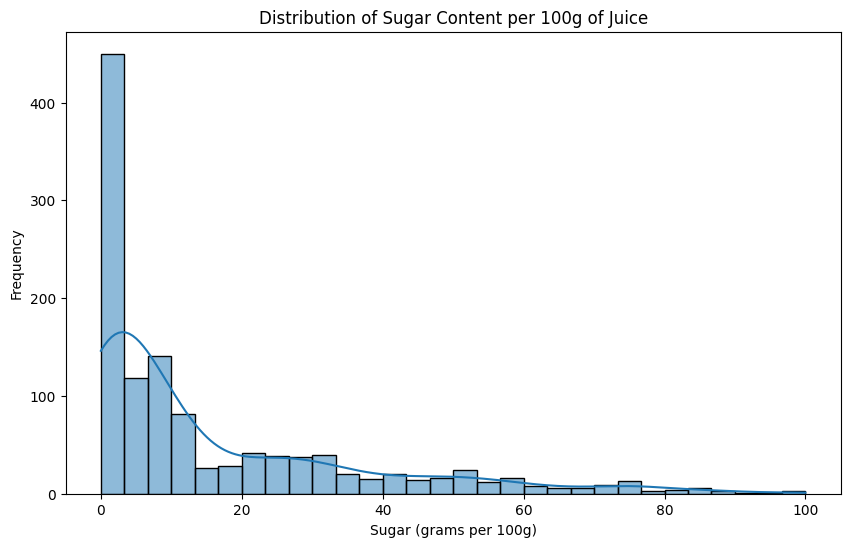

In [7]:
# 6. Visualize distribution of sugar content (sugars_100g)
plt.figure(figsize=(10, 6))
sns.histplot(df['sugars_100g'], bins=30, kde=True)  
# kde=True adds a smooth curve showing the distribution shape
plt.title('Distribution of Sugar Content per 100g of Juice')
plt.xlabel('Sugar (grams per 100g)')
plt.ylabel('Frequency')
plt.show()

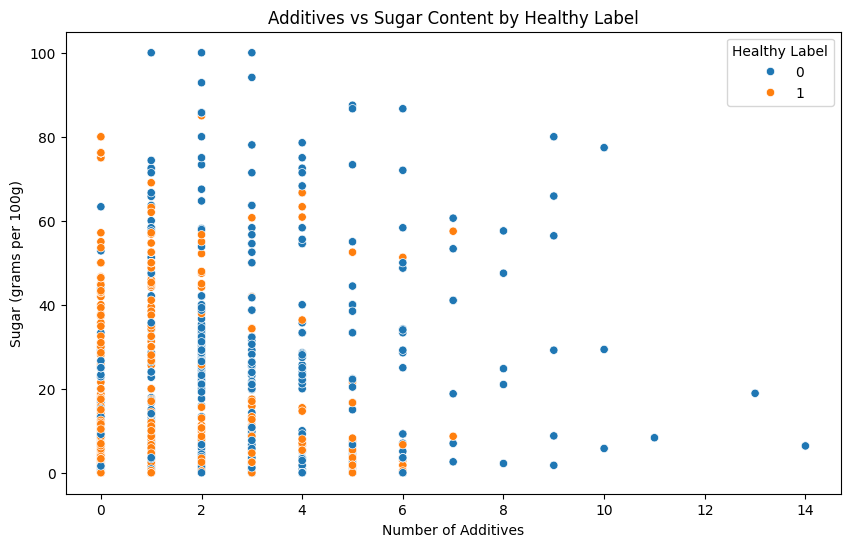

In [8]:
# 7. Explore relationship between number of additives and sugar content, colored by healthy_label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='additives_n', y='sugars_100g', hue='healthy_label')
plt.title('Additives vs Sugar Content by Healthy Label')
plt.xlabel('Number of Additives')
plt.ylabel('Sugar (grams per 100g)')
plt.legend(title='Healthy Label')
plt.show()

In [10]:
# 8. Calculate average nutrition score (nutrition-score-uk_100g) for each healthy_label group
avg_nutrition_score = df.groupby('healthy_label')['nutrition-score-uk_100g'].mean().reset_index()
print("\nAverage Nutrition Score by Healthy Label:")
print(avg_nutrition_score)


Average Nutrition Score by Healthy Label:
   healthy_label  nutrition-score-uk_100g
0              0                12.366795
1              1                 4.559767


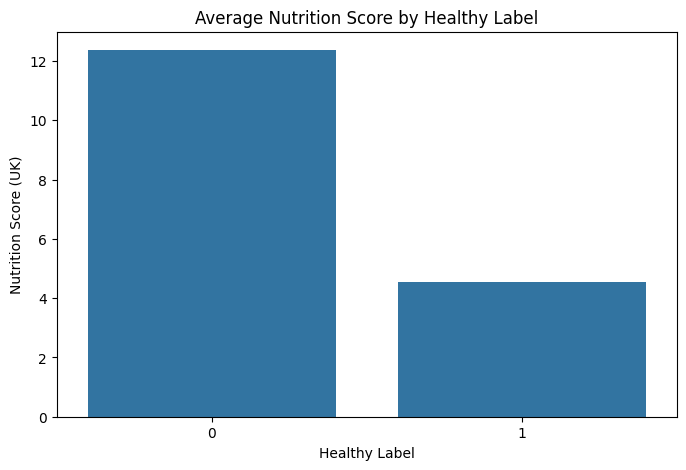

In [15]:
# 9. Visualize the average nutrition score by healthy_label
plt.figure(figsize=(8,5))
sns.barplot(data=avg_nutrition_score, x='healthy_label', y='nutrition-score-uk_100g')
plt.title('Average Nutrition Score by Healthy Label')
plt.xlabel('Healthy Label')
plt.ylabel('Nutrition Score (UK)')
plt.show()


In [10]:
# 10. Identify possible misleading products:
# Those labeled "healthy" but with sugar content greater than a threshold (e.g., 10 grams per 100g)
high_sugar_threshold = 10

# Convert to string before using .str methods to avoid errors on non-strings
mismatch = df[
    (df['sugars_100g'] > high_sugar_threshold) & 
    (df['healthy_label'].astype(str).str.strip().str.lower() == 'healthy')
]

print(f"\nProducts labeled as healthy but with sugar > {high_sugar_threshold}g per 100g (possible mismatch):")
print(mismatch[['additives_n', 'sugars_100g', 'healthy_label']])



Products labeled as healthy but with sugar > 10g per 100g (possible mismatch):
Empty DataFrame
Columns: [additives_n, sugars_100g, healthy_label]
Index: []


In [11]:
df.shape

(1204, 10)